## Essay code-visualization, regression

In [27]:
#install.packages("corrplot")
#install.packages("plm")
#install.packages("psych")
#install.packages("wordcloud")
#install.packages("tm")

In [28]:
library(tidyverse)
library(haven)
library(dplyr)
library(tidymodels)
library(scales)
library(lmtest)
library(stargazer)
library(plm)
library(ggplot2)
library(corrplot)
library(wordcloud)
library(RColorBrewer)
library(psych)
library(reshape2)
library(tm)

In [3]:
data <- read.csv("processed_tiktok_data.csv")

In [4]:
head(data)

reviewId                                                                                 
1 gp:AOqpTOHEgRaKXe2DGwhUAQfic5RCUwGhuitNpUFQqCig2Cjbx5o-ooEIDdaU25ihfXZHZIifWFMbvMbLT51dsg
2 gp:AOqpTOHBPdgFks-7jdXVptVAlY9vGpzJrnVIxFNLO1L8KjcMKIe1N5hQXPmxi7g14xUt1EmZ2Ba8iDb3Hmxphg
3 gp:AOqpTOEnyWdx0cVsDwQjcQk1uOr8_KdHHYy_t5l-y1YlzG10ar1BjSTZSEbvcFXAxdkZTfV8cw-LDuncTXDD2A
4 gp:AOqpTOFQ7bLXf-97rdnDsCQzOV8_nNGHqm70ekEkV1zA1P3B9V5Ze0ynMJMg8bW1BqMG6zOOpAszyyiKacM3Qg
5 gp:AOqpTOEluWOURDqqBYyo5wtQ3WVqK-DFIZury1FZKPn5wz_5XDRw_lNlcFdJVsuQ1O9j23XwD_HOw8JklmjpTw
6 gp:AOqpTOE5tBb9PE4-wOw_u1PAub8AGaL-MqFI0rJkyLJu8X1Ha_tDkLhEeARuE19nrmxuEXSblaKJfLt3W9ePFw
  userName              
1 Ron Thames            
2 Darwin Davis          
3 Marion Harris         
4 Jason Sanchez         
5 Zubmas                
6 Ranjeeta Bhattacharjee
  userImage                                                                               
1 https://play-lh.googleusercontent.com/a-/AOh14Gjz3HyU2QYC2fMq0zIpmnT39-EoC4qDQu1bAtB6qQ 
2 https://play-lh.googleusercontent.com/a-/AOh14Ghumnpk4R8JfHEMuyi-Ei4ZzqMxKq4Q9INpve1-bQ 
3 https://play-lh.googleusercontent.com/a-/AOh14Gh1hNSah0da2eBErTr9YDG_bQ08KC-NMKy6cZP0   
4 https://play-lh.googleusercontent.com/a-/AOh14Ggd9872UbpAZXQQMopLS9qTST--USyVqMuMaba-   
5 https://play-lh.googleusercontent.com/a-/AOh14GjY1eRqmvy8FtrleUOoobuYrQuwngb5LReuSSeC   
6 https://play-lh.googleusercontent.com/a-/AOh14GiaTiegfAFRmr855eotKp6puHLCkUkFga8J0oocDNU
  content                                                                                                                                                                                                     
1 Just did recent update 4/3/22 . Videos stopping, freezing, can't watch . Also not want to start 4/5/22 can't even watch videos now , will not start , 😒                                                    
2 thanks the app is good and a lot of the crashes have stopped thank you.                                                                                                                                     
3 It is a good app to be entertained and it is fun to make videos and gain followers but there should be more rules becouse people post some weird stuff and there is a lot of kids on this app               
4 You get a one-star until you fix this. Voice to text feature because I can't write English very well and this feature severely glitch in this app. Basically I am unable to leave any comments on any video.
5 It's so fun                                                                                                                                                                                                 
6 My go to app for entertainment                                                                                                                                                                              
  score thumbsUpCount reviewCreatedVersion at                 
1 1      91           23.9.5               2022-04-05 23:09:48
2 4       2           23.8.4               2022-04-05 21:49:02
3 4     105           23.8.4               2022-04-05 18:57:32
4 1      15           23.9.3               2022-04-05 18:34:28
5 5       3           23.6.4               2022-04-05 17:38:17
6 4       4           23.9.5               2022-04-05 16:32:50
  replyContent                                                                                                                                                                                                         
1                                                                                                                                                                                                                      
2 Thanks for reaching out. We're aware of an issue with Android System Webview that is causing issues in accessing apps like TikTok. Updating Webview in Google Play should resolve this issue. Thanks! The TikTok Team
3        

In [5]:
data2 <- read.csv("tiktok_google_play_reviews.csv")

### Figure 1 in paper

In [6]:
selected_data <- data2 %>% select(content, score, thumbsUpCount)
head(selected_data)

content                                                                                                                                         
1 Good                                                                                                                                            
2 Awesome app! Too many people on it where it's easier than fb. The girls are awesome and the guys, well, the guys wear toy masks. But we like it.
3 Not bad                                                                                                                                         
4 It is good                                                                                                                                      
5 Very interesting app                                                                                                                            
6 I love This app u can even make good friend and cool videos ☺️                                                                                   
  score thumbsUpCount
1 5     0            
2 5     0            
3 5     0            
4 2     0            
5 5     0            
6 5     0

### Figure 2 in paper

In [7]:
descriptive_stats <- describe(selected_data)
required_stats <- descriptive_stats %>% select(n:mean, sd, median, min, max)
required_stats

n      mean         sd           median min max   
content*      307057 89486.474687 54368.328924 90643  1   189620
score         307057     4.305966     1.374927     5  1        5
thumbsUpCount 307057     3.104235   101.064320     0  0    20102

### Figure 6 in paper

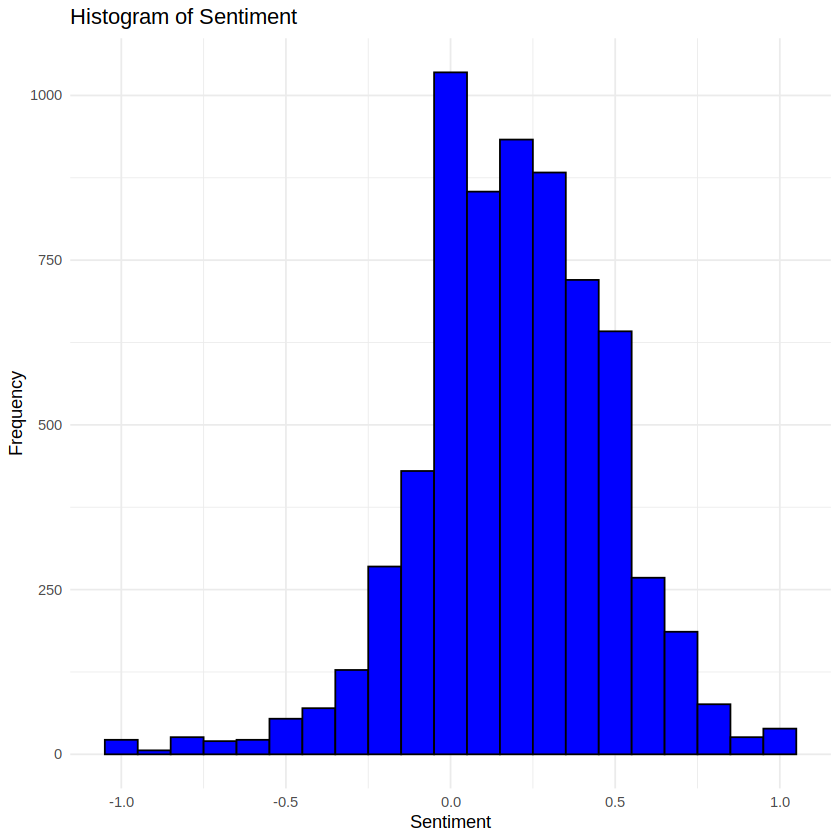

In [8]:
# Histogram of sentiment
ggplot(data, aes(x=sentiment)) +
  geom_histogram(binwidth = 0.1, fill="blue", color="black") + 
  labs(title="Histogram of Sentiment", x="Sentiment", y="Frequency") +
  theme_minimal()

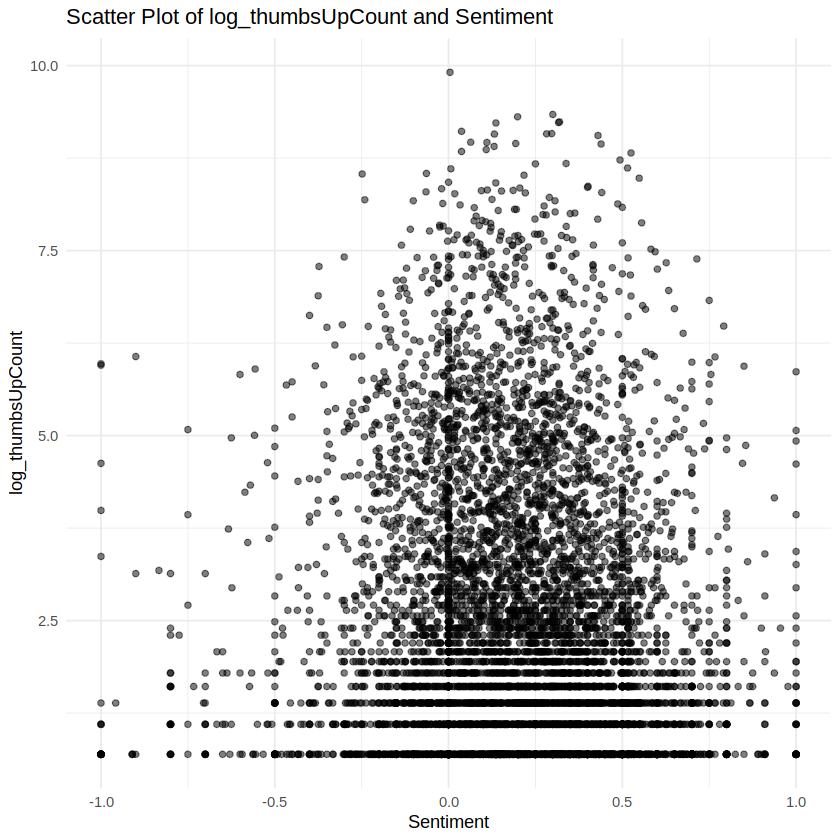

In [9]:
# Scatter plot for sentiment vs log_thumbsUpCount
ggplot(data, aes(x=sentiment, y=log_thumbsUpCount)) + 
  geom_point(alpha=0.5) + 
  labs(title="Scatter Plot of log_thumbsUpCount and Sentiment", x="Sentiment", y="log_thumbsUpCount") +
  theme_minimal()


### Figure 5 in paper 

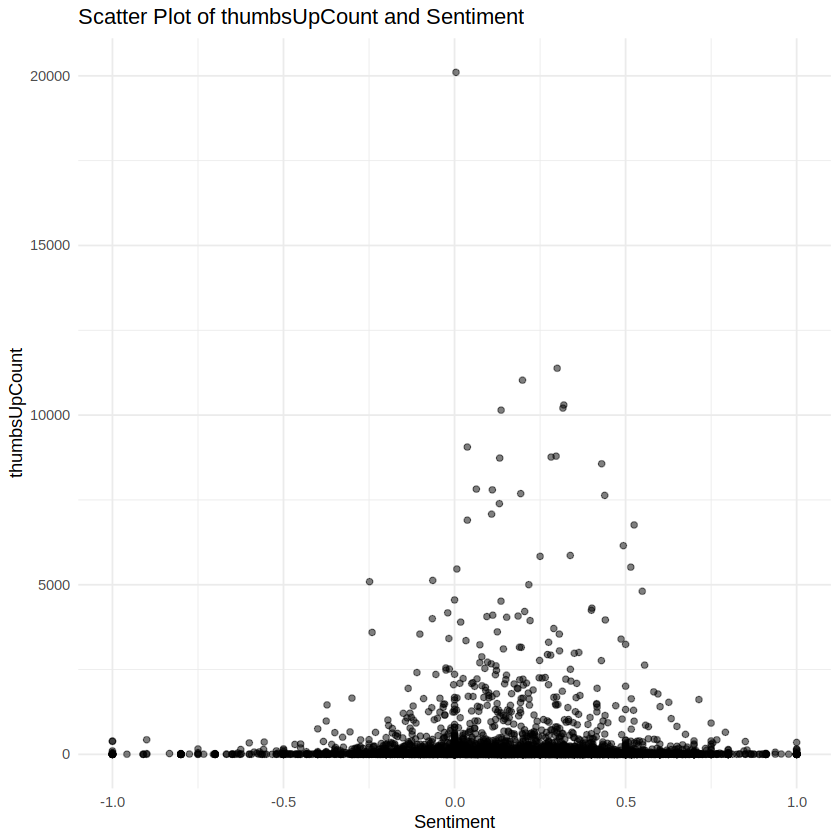

In [10]:
# Scatter plot for sentiment vs thumbsUpCount
ggplot(data, aes(x=sentiment, y=thumbsUpCount)) + 
  geom_point(alpha=0.5) + 
  labs(title="Scatter Plot of thumbsUpCount and Sentiment", x="Sentiment", y="thumbsUpCount") +
  theme_minimal() 

## Regression

$$
\log(Y_i) = \beta_0 + \beta_1 X_{1i} + \beta_2 X_{2i} + \beta_3 X_{3i} +\beta_4 X_{4i}+ \beta_5 X_{5i}+\varepsilon_i
$$



In [11]:
#Sample regression
sample_reg <- lm(log_thumbsUpCount ~ sentiment_dummy, data=data)
#Mutiple regression
muti_reg<- lm(log_thumbsUpCount ~ sentiment_dummy + subjectivity, data=data)
muti_reg2 <- lm(log_thumbsUpCount ~ sentiment_dummy + reply_dummy, data=data)
muti_reg3 <- lm(log_thumbsUpCount ~ sentiment_dummy + word_count, data=data)
muti_reg4 <- lm(log_thumbsUpCount ~ sentiment_dummy + contains_emoji, data=data)
final_reg <- lm(log_thumbsUpCount ~ sentiment_dummy + word_count + subjectivity+ contains_emoji   + reply_dummy, data=data)

### Figure 8 in paper

In [12]:
stargazer(sample_reg, muti_reg, muti_reg2, muti_reg3, muti_reg4,final_reg, type = "text", title = "Regression Results")


Regression Results
                                                                                      Dependent variable:                                                                   
                    --------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                                       log_thumbsUpCount                                                                    
                              (1)                      (2)                       (3)                       (4)                      (5)                       (6)           
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
sentiment_dummy            -0.262***                -0.263***                 -0.235***                   0.037    

## Fixed Effect

$$
\log(Y_i) = \beta_0 + \beta_1X_{1i} + \beta_2X_{2i} + \beta_3X_{3i} + \beta_4 X_{4i}+ \beta_5 X_{5i}+\sum_{j=1}^{n} \gamma_j D_{ji} + \varepsilon_i
$$


In [13]:
data <- data %>%
  mutate(major_version = str_split(reviewCreatedVersion, "\\.", simplify = TRUE)[, 1])

table(data$major_version)


       11   12   13   14   15   16   17   18   19   20   21   22   23    5    7 
 147    2    2    1    7    7   11    9   26   18   29   33  878 5542    3    1 
   8    9 
   1    8 

In [14]:
data_v23 <- data %>% 
  filter(str_detect(reviewCreatedVersion, "^23"))

data_v23 <- data_v23 %>%
  mutate(minor_version = str_split(reviewCreatedVersion, "\\.", simplify = TRUE)[, 2])

table(data_v23$minor_version)



   0    1    2    3    4    5    6    7    8    9 
1093  733  571  677  599  519  556  418  309   67 

In [15]:
pdata_v23 <- pdata.frame(data_v23, index = "minor_version")

fe_model_v23 <- plm(log_thumbsUpCount ~ sentiment_dummy + word_count + subjectivity+ contains_emoji   + reply_dummy,
                    data = pdata_v23, 
                    model = "within")

In [16]:
summary(fe_model_v23)

Oneway (individual) effect Within Model

Call:
plm(formula = log_thumbsUpCount ~ sentiment_dummy + word_count + 
    subjectivity + contains_emoji + reply_dummy, data = pdata_v23, 
    model = "within")

Unbalanced Panel: n = 10, T = 67-1093, N = 5542

Residuals:
    Min.  1st Qu.   Median  3rd Qu.     Max. 
-4.13875 -1.10959 -0.39882  0.86349  6.72715 

Coefficients:
                   Estimate  Std. Error t-value  Pr(>|t|)    
sentiment_dummy  0.02949757  0.04643374  0.6353  0.525284    
word_count       0.03139099  0.00093459 33.5880 < 2.2e-16 ***
subjectivity    -0.29012445  0.11021875 -2.6323  0.008505 ** 
contains_emoji  -0.07953815  0.07002244 -1.1359  0.256050    
reply_dummy      2.66107474  0.19125942 13.9134 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    18936
Residual Sum of Squares: 14904
R-Squared:      0.21293
Adj. R-Squared: 0.21094
F-statistic: 299.051 on 5 and 5527 DF, p-value: < 2.22e-16

### Figure 10 in paper

In [17]:
stargazer(sample_reg, final_reg, fe_model_v23, type = "text",
          title = "Regression Results",
          add.lines = list(c("Fixed Effects", "No", "No", "Yes")))


Regression Results
                                                Dependent variable:                             
                    ----------------------------------------------------------------------------
                                                 log_thumbsUpCount                              
                                           OLS                                   panel          
                                                                                linear          
                              (1)                       (2)                       (3)           
------------------------------------------------------------------------------------------------
sentiment_dummy            -0.262***                   0.064                     0.029          
                            (0.044)                   (0.042)                   (0.046)         
                                                                                                
word_count

### Figure 9 in paper

In [18]:
selected_data <- data[, c("thumbsUpCount", "sentiment", "subjectivity", "word_count", "contains_emoji","reply_dummy")]

In [21]:
corr_matrix <- cor(selected_data, use = "complete.obs") 

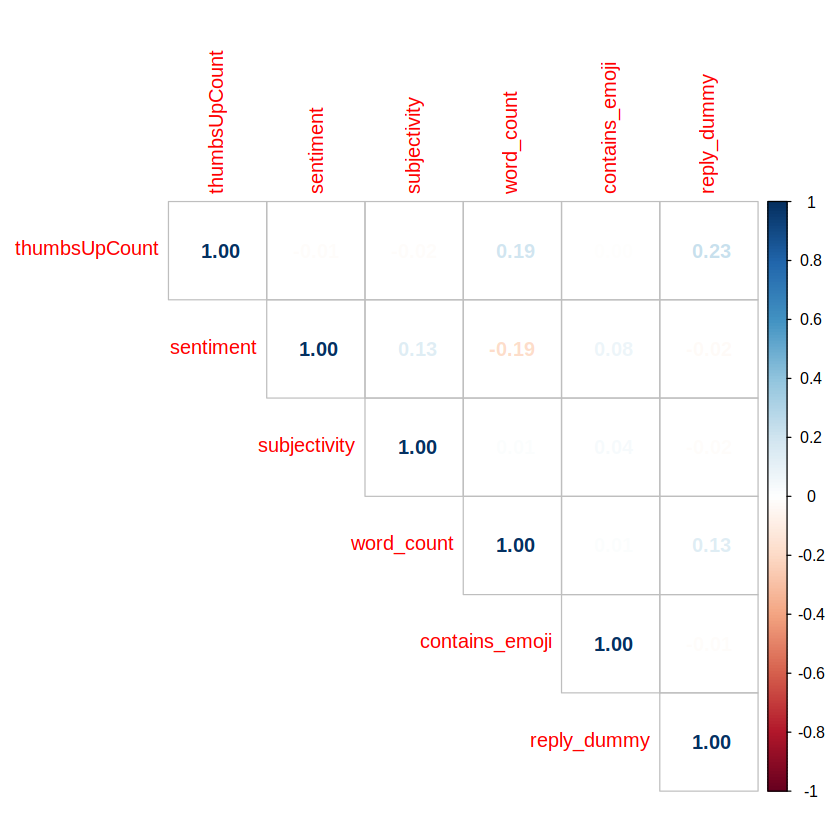

In [22]:
corrplot(corr_matrix, method = "number", type = "upper", addCoef.col = "black")

### Figure 7 in paper

In [23]:
text_data <- data$content

In [25]:
corpus <- Corpus(VectorSource(text_data))
corpus <- tm_map(corpus, content_transformer(tolower))
corpus <- tm_map(corpus, removePunctuation)
corpus <- tm_map(corpus, removeWords, custom_stopwords)
corpus <- tm_map(corpus, removeNumbers)

Warning message in tm_map.SimpleCorpus(corpus, content_transformer(tolower)):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, removeWords, custom_stopwords):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, removeNumbers):
“transformation drops documents”


In [24]:
custom_stopwords <- c(stopwords("english"), "app", "tiktok", "video", "videos", "use") 

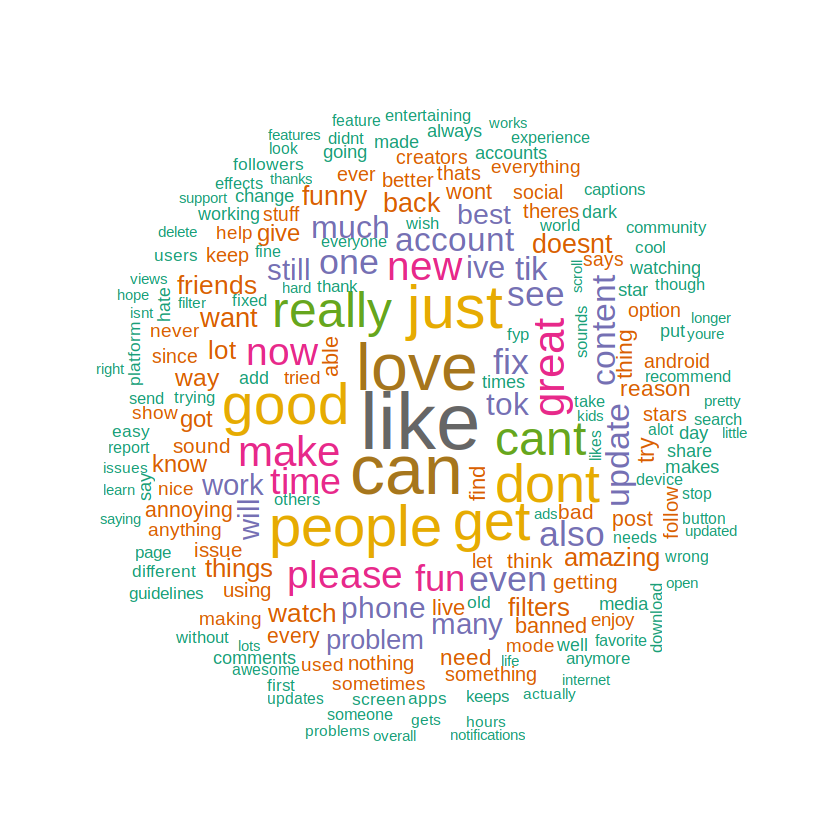

In [26]:
set.seed(1234) 
wordcloud(corpus, scale=c(4,0.5), max.words=200, random.order=FALSE, colors=brewer.pal(8, "Dark2"))